In [1]:
import FinancialMachineLearning as fml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('./Data/IVE_tickbidask.parq')
mad = fml.madOutlier(df.price.values.reshape(-1, 1))
df = df.loc[~mad]
df

86.96
[36.17 36.25 36.21 ... 29.26 29.26 29.26]
[1.41225268 1.41537627 1.41381447 ... 1.14245268 1.14245268 1.14245268]


,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


### Chapter 5. Fractionally Differentiated Features

#### Exercise 1
IID인 가우스 랜덤 프로세스로부터 시계열을 생성하라. 이는 기억이 없는 정상성 계열이다.

<Axes: >

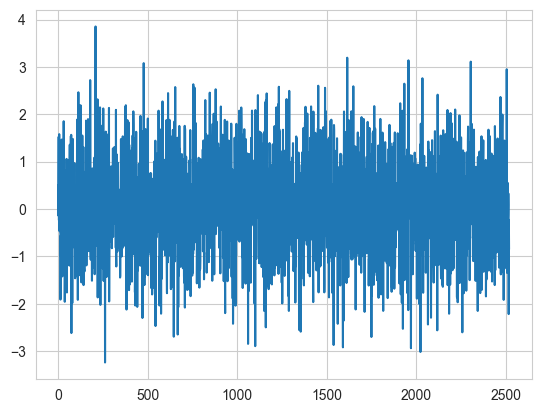

In [3]:
np.random.seed(42)

N = 252 * 10
s = pd.Series(np.random.randn(N))
s.plot()

**(a)** 이 계열의 ADF 통계량을 계산하라. p-value는 얼마인가?

In [4]:
import statsmodels.api as sm
adf = lambda s: sm.tsa.stattools.adfuller(s)
p_val = lambda s: sm.tsa.stattools.adfuller(s)[1]
res = adf(s); p = res[1]
res, p

((-26.160330277320334,
  0.0,
  3,
  2516,
  {'1%': -3.4329517425474014,
   '5%': -2.862689439250822,
   '10%': -2.5673818904827863},
  6995.884924248583),
 0.0)

p-value는 0에 한없이 가깝다

**(b)** 관측값의 누적 합을 계산하라. 이는 기억이 없는 비정상성 계열이다

<Axes: >

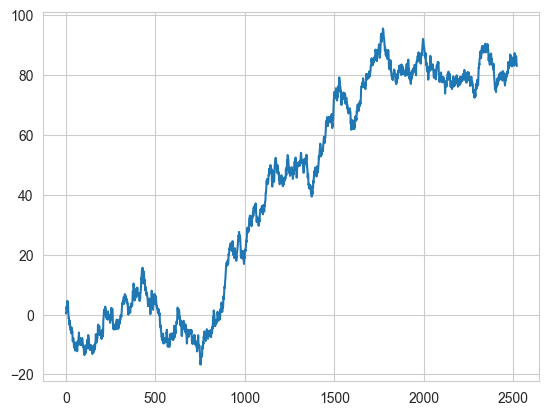

In [5]:
cumsum = s.cumsum()
cumsum.plot()

(i) 이 누적 계열의 적분 차수는 무엇인가?

In [6]:
for o in range(5):
    diff_ = np.diff(cumsum,o)
    print('=' * 27)
    print(f'order: {o}, pVal: {p_val(diff_)}')

order: 0, pVal: 0.8580719159583086
order: 1, pVal: 0.0
order: 2, pVal: 1.4485933828201669e-29
order: 3, pVal: 0.0
order: 4, pVal: 0.0


(ii) 이 계열에 대한 ad fuller 통계량을 계산하라. p-value는 얼마인가?

In [7]:
p_val(cumsum)

0.8580719159583086

**(c)** 시계열을 두 번 미분하라. 과미분된 계열의 p-value는 얼마인가?

In [8]:
p_val(np.diff(cumsum, 2))

1.4485933828201669e-29

#### Exercise 2

sinusoidal function 형태를 따르는 시계열을 생성하라. 이는 기억이 있는 정상성 계열이다

<Axes: >

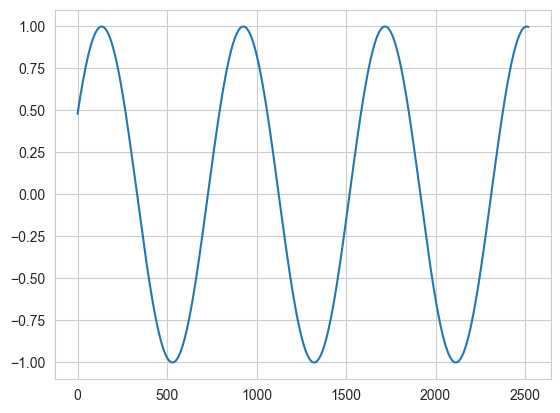

In [9]:
np.random.seed(42)

rand = np.random.random(N)

idx = np.linspace(0,10, N)
s = pd.Series(1 * np.sin(2. * idx + .5))
s.plot()

**(a)** 이 계열의 ad fuller 통계량을 계산하라. p-value는 얼마인가?

In [10]:
p_val(s)

0.0

**(b)** 모든 관측값을 동일한 양수값만큼 이동하라. 관측값의 누적 합을 계산하라. 이는 기억이 있는 비정상 계열이다.

<Axes: >

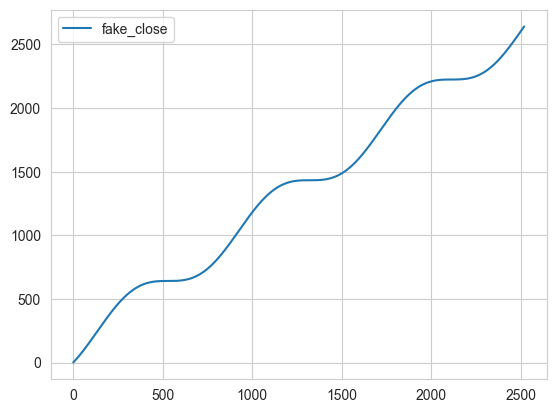

In [11]:
cumsum_s = (s + 1).cumsum().rename('fake_close').to_frame()
cumsum_s.plot()

**(a)** 이 계열의 ADF 통계량을 계산하라. p-value는 얼마인가?

In [12]:
adf(cumsum_s['fake_close'].dropna()), p_val(cumsum_s['fake_close'])

((0.20879531088398076,
  0.9727506040782621,
  27,
  2492,
  {'1%': -3.432976825339513,
   '5%': -2.862700515844509,
   '10%': -2.5673877878037974},
  -142670.26597538346),
 0.9727506040782621)

**(b)** 모든 관측값을 동일한 양수값만큼 이동하라. 관측값의 누적 합을 계산하라. 이는 기억이 있는 비정상 계열이다.

,adfStat,pVal,lags,nObs,95% conf
0.0,2.833609e+00,1.000000e+00,1.0,2517.0,-2.862689
0.1,8.870880e+00,1.000000e+00,1.0,761.0,-2.865345
0.2,-7.366367e+00,9.213847e-11,1.0,963.0,-2.864546
0.3,-2.267608e+01,0.000000e+00,1.0,1357.0,-2.863672
0.4,-2.259792e+01,0.000000e+00,1.0,1821.0,-2.863128
0.5,-3.781556e+01,0.000000e+00,1.0,2188.0,-2.862862
0.6,-4.388734e+01,0.000000e+00,1.0,2385.0,-2.862753
0.7,-6.322546e+01,0.000000e+00,1.0,2466.0,-2.862713
0.8,-7.371512e+01,0.000000e+00,1.0,2497.0,-2.862698
0.9,-4.877829e+01,0.000000e+00,1.0,2510.0,-2.862692


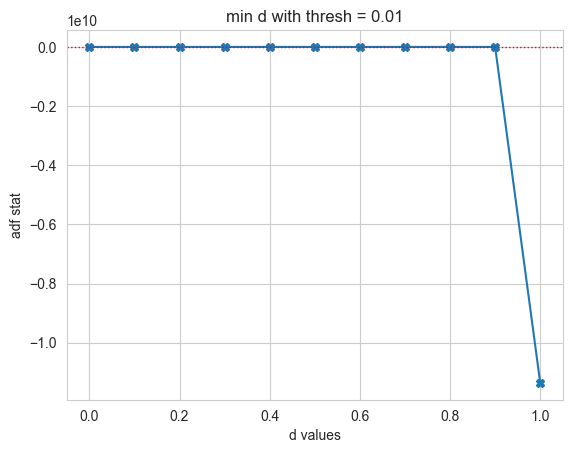

In [13]:
cols = ['adfStat','pVal','lags','nObs','95% conf']#,'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0,1,11):
    try:
        df0 = fml.fracDiff(cumsum_s, d)
        df0 = sm.tsa.stattools.adfuller(df0['fake_close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d]=list(df0[:4])+[df0[4]['5%']]
    except:
        break

f,ax=plt.subplots()
out['adfStat'].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1,color='r',ls='dotted')
ax.set_title('min d with thresh = 0.01')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat')
display(out)

(iii) FFD를 적용하라. $\tau = 1e-5$이다. p-value가 5%이하로 되는 최소 $d$값은 얼마인가? 그 이유는 무엇인가?

d: 0.1, error: zero-size array to reduction operation maximum which has no identity
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf
0.0,2.833609e+00,1.0,1.0,2517.0,-2.862689
0.5,-5.861336e+03,0.0,1.0,6.0,-3.646238
0.6,-5.718256e+03,0.0,1.0,18.0,-3.042046
0.7,-6.338668e+03,0.0,1.0,48.0,-2.923954
0.8,-8.751121e+03,0.0,1.0,142.0,-2.882118
0.9,-8.327682e+03,0.0,1.0,495.0,-2.867397
1.0,-1.135811e+10,0.0,1.0,2516.0,-2.862689


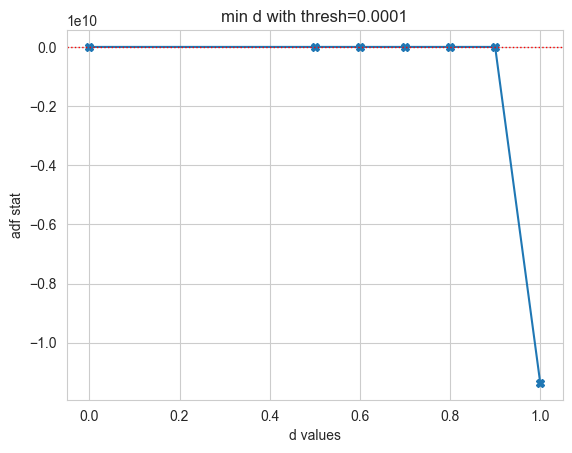

In [14]:
cols = ['adfStat','pVal','lags','nObs','95% conf']#,'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0,1,11):
    try:
        df0 = fml.fracDiff(cumsum_s, d, thres = 1e-5)
        df0 = sm.tsa.stattools.adfuller(df0['fake_close'],maxlag=1,regression='c',autolag=None)
        out.loc[d]=list(df0[:4])+[df0[4]['5%']]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

f,ax=plt.subplots()
out['adfStat'].plot(ax=ax, marker='X')
ax.axhline(out['95% conf'].mean(),lw=1,color='r',ls='dotted')
ax.set_title('min d with thresh=0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

p-value가 0이 되는 지점은 0.5차분부터이다

#### Exercise 3
Exercise 2.b의 계열을 가져오라

**(a)** sine function에 시계열을 적합화하라. $\mathbf{R^2}$는 얼마인가?

In [15]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [16]:
res = fit_sin(cumsum_s.index.values, cumsum_s.values.ravel())
res

{'amp': -2126.28497327643,
 'omega': 0.0004797999160483457,
 'phase': 2.6281709498529127,
 'offset': 1186.5758371354623,
 'freq': 7.636252833417061e-05,
 'period': 13095.42810871705,
 'fitfunc': <function __main__.fit_sin.<locals>.<lambda>(t)>,
 'maxcov': 20695.21399560592,
 'rawres': (array([1.01493055e+03, 2.49332750e-03, 0.00000000e+00, 1.36801775e+03]),
  array([-2.12628497e+03,  4.79799916e-04,  2.62817095e+00,  1.18657584e+03]),
  array([[ 2.06952140e+04,  4.98650071e-03, -7.28184777e+00,
           3.99478365e+03],
         [ 4.98650071e-03,  1.20345336e-09, -1.74718033e-06,
           9.43036453e-04],
         [-7.28184777e+00, -1.74718033e-06,  2.76112066e-03,
          -1.81976093e+00],
         [ 3.99478365e+03,  9.43036453e-04, -1.81976093e+00,
           1.64645583e+03]]))}

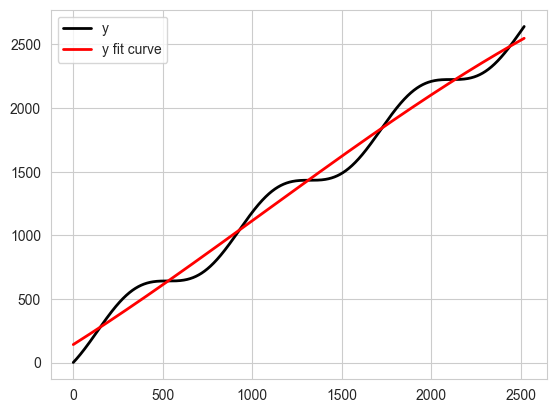

In [17]:
x = cumsum_s.index.values
y = cumsum_s.values.ravel()

plt.plot(x, y, "-k", label="y", linewidth=2)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

In [18]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y, res["fitfunc"](x))
r_value ** 2

0.9859147406461111

**(b)** $\mathbf{FFD}(d = 1)$을 적용하라. sine function에 계열을 적합화하라. $\mathbf{R^2}$은 얼마인가?

<Axes: >

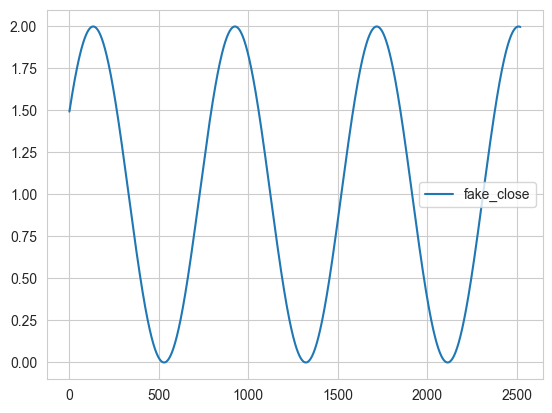

In [19]:
df1 = fml.fracDiff(cumsum_s, d = 1)
df1.plot()

In [20]:
x = df1.index.values
y = df1.values.ravel()

res = fit_sin(x, y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y, res["fitfunc"](x))
r_value**2

1.0

**(c)** sine function을 $\mathbf{FFD}(d)$에 적합화할 때 $\mathbf{R^2}$을 최대화하는 $d$값은 얼마인가? 그 이유는 무엇인가?

d: 0.1, error: zero-size array to reduction operation maximum which has no identity
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf
0.0,-1.135513e+10,0.0,1.0,2515.0,-2.862690
0.5,-4.385108e+03,0.0,1.0,6.0,-3.646238
0.6,-4.506153e+04,0.0,1.0,18.0,-3.042046
0.7,-1.980916e+05,0.0,1.0,48.0,-2.923954
0.8,-2.054363e+05,0.0,1.0,141.0,-2.882266
0.9,-1.242186e+05,0.0,1.0,494.0,-2.867408
1.0,-4.849487e+07,0.0,1.0,2514.0,-2.862690


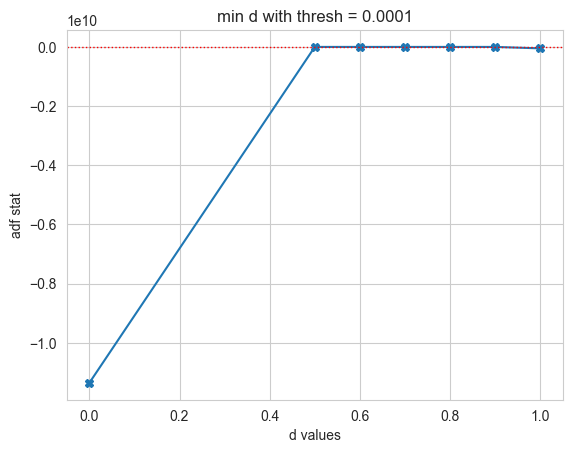

In [21]:
cols = ['adfStat','pVal','lags','nObs','95% conf']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0,1,11):
    try:
        df0 = fml.fracDiff(df1, d, thres = 1e-5)
        df0 = sm.tsa.stattools.adfuller(df0['fake_close'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df0[:4]) + [df0[4]['5%']]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

f,ax = plt.subplots()
out['adfStat'].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

#### Exercise 4

E-mini S&P 500 future의 dollar bar 계열을 가져오라. $d \in [0,2]$의 몇 개 값에 대해 코드 5.3을 사용해 `fracDiff_FFD(fracDiff_FFD(series, d), -d)`를 계산하라. 무엇을 얻었는가? 이유는 무엇인가?

In [22]:
dollar_M = 1000000
dollar_df = fml.BarSampling(df, 'dv', dollar_M)
dollar_df = dollar_df.groupby(level = 0).first()
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


,adfStat,pVal,lags,nObs,95% conf
0.0,-1.340569,6.104138e-01,1.0,49993.0,-2.861598
0.1,-2.237594,1.928850e-01,1.0,24.0,-2.992216
0.2,-1.725026,4.182668e-01,1.0,46.0,-2.926785
0.3,-3.858231,2.364681e-03,1.0,107.0,-2.888955
0.4,-5.251617,6.891471e-06,1.0,277.0,-2.872031
0.5,-8.647726,5.215539e-14,1.0,780.0,-2.865253
0.6,-17.473710,4.528242e-30,1.0,2344.0,-2.862774
0.7,-38.478785,0.000000e+00,1.0,7277.0,-2.861937
0.8,-78.343972,0.000000e+00,1.0,20547.0,-2.861681
0.9,-128.268479,0.000000e+00,1.0,39908.0,-2.861612


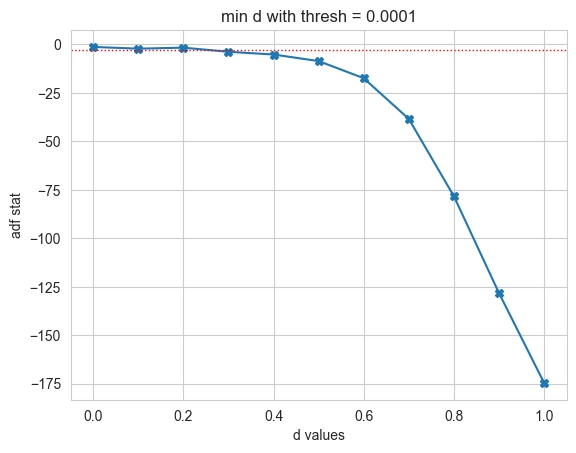

In [23]:
cols = ['adfStat','pVal','lags','nObs','95% conf']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0,1,11):
    try:
        df0 = fml.fracDiff(dollar_df, d, thres = 1e-5)
        df0 = sm.tsa.stattools.adfuller(df0['price'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df0[:4]) + [df0[4]['5%']]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

f,ax = plt.subplots()
out['adfStat'].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

d: 0.1, error: zero-size array to reduction operation maximum which has no identity
d: 0.2, error: zero-size array to reduction operation maximum which has no identity
d: 0.30000000000000004, error: zero-size array to reduction operation maximum which has no identity
d: 0.4, error: zero-size array to reduction operation maximum which has no identity
d: 0.5, error: zero-size array to reduction operation maximum which has no identity
d: 0.6000000000000001, error: zero-size array to reduction operation maximum which has no identity
d: 0.7000000000000001, error: zero-size array to reduction operation maximum which has no identity
d: 0.8, error: zero-size array to reduction operation maximum which has no identity
d: 0.9, error: zero-size array to reduction operation maximum which has no identity
d: 1.0, error: zero-size array to reduction operation maximum which has no identity


,adfStat,pVal,lags,nObs,95% conf
0.0,-1.335263,0.612889,1.0,49992.0,-2.861598


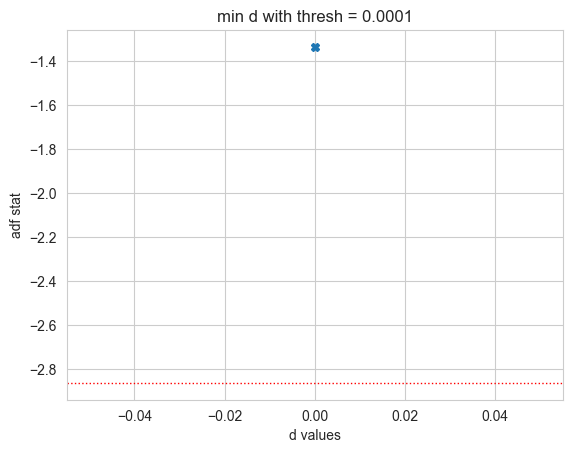

In [24]:
cols = ['adfStat','pVal','lags','nObs','95% conf']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0,1,11):
    try:
        df0 = fml.fracDiff(fml.fracDiff(dollar_df, d, thres = 1e-5), -d, thres = 1e-5)
        df0 = sm.tsa.stattools.adfuller(df0['price'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df0[:4]) + [df0[4]['5%']]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

f,ax = plt.subplots()
out['adfStat'].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

#### Exercise 5

E-mini S&P 500 future의 Dollar Bar 계열을 가져오라

In [25]:
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


**(a)** 누적 로그 가격에 대한 새로운 계열을 형성하라

<Axes: xlabel='dates'>

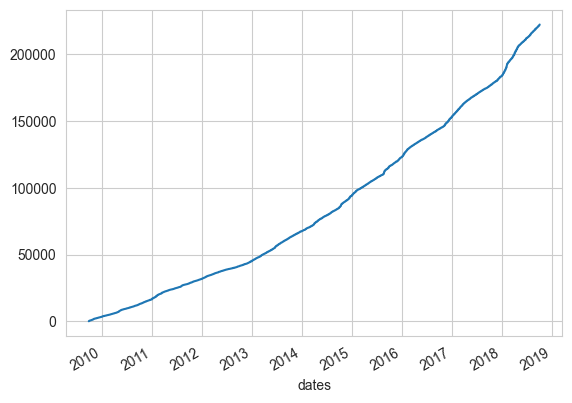

In [26]:
cumsum_dollar = np.log(dollar_df.price).cumsum()
cumsum_dollar.plot()

**(b)** $\tau = 1e-5$로 $\mathbf{FFD}$를 적용하라. 새로운 계열을 정상성응로 만드는 최소 $d$값을 $d \in [0,2]$에서 찾아보라.

In [27]:
cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(dollar_df).resample('1D').last().dropna() # daily return
        df2 = fml.fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'price'], df2['price'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['price'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

d: 0.1, error: zero-size array to reduction operation maximum which has no identity
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: Invalid input, x is constant
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-1.012841,7.485521e-01,1.0,2270.0,-2.862814,1.000000
0.5,-2.698273,7.433753e-02,1.0,5.0,-3.929280,0.892108
0.6,-1.538065,5.146042e-01,1.0,15.0,-3.084908,0.705352
0.7,-2.933960,4.153905e-02,1.0,40.0,-2.937069,0.370850
0.8,-5.592348,1.320352e-06,1.0,118.0,-2.886363,0.249107
0.9,-15.055688,9.157372e-28,1.0,413.0,-2.868564,0.108808
1.0,-34.122726,0.000000e+00,1.0,2269.0,-2.862815,0.015943
1.1,-27.386939,0.000000e+00,1.0,1140.0,-2.864079,0.033600
1.2,-30.227045,0.000000e+00,1.0,1207.0,-2.863938,0.021236
1.3,-34.980187,0.000000e+00,1.0,1421.0,-2.863576,0.013263


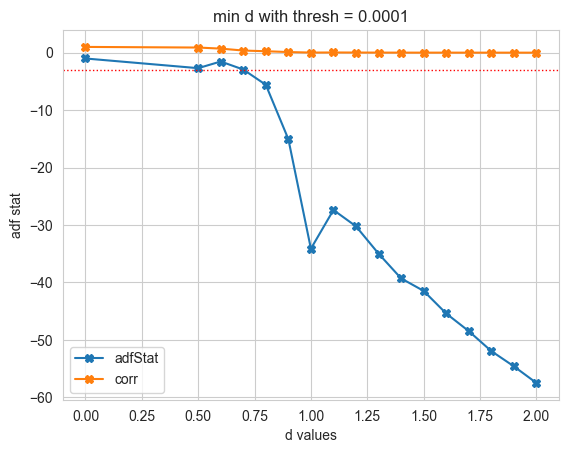

In [28]:
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

In [29]:
min_ffd = out[out.pVal < 0.05].iloc[0].name
print("The min. D that makes the fracdiff stationary",min_ffd)

The min. D that makes the fracdiff stationary 0.7000000000000001


**(c)** fracdiff 계열과 원 계열의 상관관계를 계산하라

In [30]:
dfx2 = fml.fracDiff_FFD(dollar_df, min_ffd, thres = 1e-5)
dfx2

,price,bid,ask,size,v,dv
2009-10-30 15:38:29,0.385793,0.389346,0.379426,-204.558434,-204.558434,-1.012005e+04
2009-10-30 15:53:12,0.148127,0.148462,0.145559,-105.676187,-105.676187,-5.354629e+03
2009-11-02 09:29:50,0.394654,0.294713,0.392871,1112.634132,1112.634132,5.524649e+04
2009-11-02 09:50:40,0.159507,0.219493,0.158112,-116.495284,-116.495284,-5.962864e+03
2009-11-02 09:54:04,0.441356,0.468815,0.460201,-854.446859,-854.446859,-4.232850e+04
...,...,...,...,...,...,...
2018-10-05 15:58:23,0.572164,0.580718,0.580800,294.218115,294.218115,3.410035e+04
2018-10-05 15:59:20,0.594463,0.586404,0.596479,-977.678993,-977.678993,-1.136489e+05
2018-10-05 15:59:55,0.615191,0.613300,0.616368,215.800302,215.800302,2.503105e+04
2018-10-05 15:59:59,0.620507,0.609351,0.601365,1155.402601,1155.402601,1.342235e+05


In [31]:
dfx2.price

2009-10-30 15:38:29    0.385793
2009-10-30 15:53:12    0.148127
2009-11-02 09:29:50    0.394654
2009-11-02 09:50:40    0.159507
2009-11-02 09:54:04    0.441356
                         ...   
2018-10-05 15:58:23    0.572164
2018-10-05 15:59:20    0.594463
2018-10-05 15:59:55    0.615191
2018-10-05 15:59:59    0.620507
2018-10-05 16:00:00    0.633503
Name: price, Length: 49625, dtype: float64

In [32]:
dollar_df.price

dates
2009-09-28 09:46:35     51.07
2009-09-28 09:53:49     51.14
2009-09-28 09:55:26     51.14
2009-09-28 10:02:52     51.25
2009-09-28 10:10:21     51.29
                        ...  
2018-10-05 15:58:23    116.19
2018-10-05 15:59:20    116.18
2018-10-05 15:59:55    116.19
2018-10-05 15:59:59    116.20
2018-10-05 16:00:00    116.22
Name: price, Length: 49996, dtype: float64

In [33]:
frac_corr = pd.DataFrame([dfx2.price, dollar_df.price]).T.dropna().corr()
frac_corr

,price,price
price,1.000000,0.488167
price,0.488167,1.000000


**(d)** Engel - Granger Cointegration test를 원 계열과 fracdiff 계열에 적용하라. 공적분 되었는가? 그 이유는 무엇인가?

In [34]:
sm.tsa.stattools.coint(frac_corr.iloc[:,0], frac_corr.iloc[:,1])

(-inf, 0.0, array([-48.37534, -16.26923, -10.00565]))

**(e)** Jarque-Bera Nomality test를 fracdiff 계열에 적용하라

In [35]:
import scipy.stats as stats
stats.jarque_bera(dfx2)

SignificanceResult(statistic=896220553036.2236, pvalue=0.0)

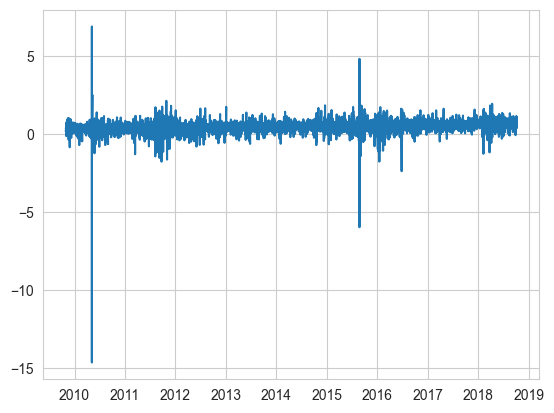

In [36]:
plt.plot(dfx2.price)

#### Exercise 6
Exercise 5의 fracdiff 계열을 가져오라.

**(a)** $\mathbf{CUSUM}$ filter를 적용하라. 여기서 $h$는 계열 표준 편차의 2배이다

In [37]:
tEvents = fml.getTEvents(dfx2.price, h = dfx2.std().iat[0] * 2)
tEvents

DatetimeIndex(['2009-11-02 12:37:26', '2009-11-02 13:28:29',
               '2009-11-03 09:57:00', '2009-11-04 11:53:41',
               '2009-11-04 14:41:43', '2009-11-04 15:43:57',
               '2009-11-05 09:46:35', '2009-11-06 10:39:27',
               '2009-11-06 12:37:18', '2009-11-09 09:55:20',
               ...
               '2018-09-26 09:43:07', '2018-09-26 10:07:41',
               '2018-09-26 15:47:29', '2018-09-27 10:02:15',
               '2018-09-27 15:39:35', '2018-09-28 10:35:39',
               '2018-10-01 09:41:05', '2018-10-02 10:38:30',
               '2018-10-03 09:44:00', '2018-10-05 11:53:14'],
              dtype='datetime64[ns]', length=3484, freq=None)

**(b)** 필터링된 timestamp로 feature matrix를 표본 추출하라. feature중 하나로 fracdiff의 값을 사용하라

In [38]:
dollar_feature = dollar_df.price.loc[tEvents]
dollar_feature

2009-11-02 12:37:26     49.5300
2009-11-02 13:28:29     49.3600
2009-11-03 09:57:00     49.6125
2009-11-04 11:53:41     50.3905
2009-11-04 14:41:43     50.4500
                         ...   
2018-09-28 10:35:39    115.9530
2018-10-01 09:41:05    116.3600
2018-10-02 10:38:30    116.0500
2018-10-03 09:44:00    116.9400
2018-10-05 11:53:14    116.0700
Name: price, Length: 3484, dtype: float64

In [39]:
frac_diff_feature = dfx2.loc[tEvents]
frac_diff_feature

,price,bid,ask,size,v,dv
2009-11-02 12:37:26,-0.025161,-0.022824,-0.014612,-347.770145,-347.770145,-17447.013820
2009-11-02 13:28:29,0.309668,0.308941,0.300175,183.176019,183.176019,9015.280894
2009-11-03 09:57:00,0.473492,0.473386,0.479503,-440.919645,-440.919645,-21775.660221
2009-11-04 11:53:41,0.190426,0.199256,0.200057,-2734.142039,-2734.142039,-138152.007219
2009-11-04 14:41:43,0.529761,0.524962,0.521984,-376.071510,-376.071510,-18754.372511
...,...,...,...,...,...,...
2018-09-28 10:35:39,0.746292,0.751325,0.751375,-245.756908,-245.756908,-28463.599996
2018-10-01 09:41:05,0.624905,0.625806,0.603581,-1688.254083,-1688.254083,-196465.437273
2018-10-02 10:38:30,0.421697,0.426438,0.422115,-794.254657,-794.254657,-92501.512046
2018-10-03 09:44:00,0.669960,0.696350,0.683683,-1608.477580,-1608.477580,-188091.055426


In [40]:
feature_Mat = (pd.DataFrame().assign(dollar = dollar_feature, frac_diff_dollar = frac_diff_feature.price).drop_duplicates().dropna())
feature_Mat

,dollar,frac_diff_dollar
2009-11-02 12:37:26,49.5300,-0.025161
2009-11-02 13:28:29,49.3600,0.309668
2009-11-03 09:57:00,49.6125,0.473492
2009-11-04 11:53:41,50.3905,0.190426
2009-11-04 14:41:43,50.4500,0.529761
...,...,...
2018-09-28 10:35:39,115.9530,0.746292
2018-10-01 09:41:05,116.3600,0.624905
2018-10-02 10:38:30,116.0500,0.421697
2018-10-03 09:44:00,116.9400,0.669960


**(c)** Triple Barrier Method를 사용해 Label을 구성하라. 대칭 Horizonal Barrier는 일별 표준 편차의 2배고, 5일 Vertical Barrier이다.

In [41]:
dailyVol = fml.getDailyVolatility(feature_Mat.dollar)
dailyVol

2009-11-04 11:53:41         NaN
2009-11-04 14:41:43    0.000848
2009-11-04 15:43:57    0.006350
2009-11-05 09:46:35    0.005167
2009-11-06 10:39:27    0.005155
                         ...   
2018-09-28 10:35:39    0.008525
2018-10-01 09:41:05    0.008464
2018-10-02 10:38:30    0.008383
2018-10-03 09:44:00    0.008341
2018-10-05 11:53:14    0.008310
Name: dailyVol, Length: 3481, dtype: float64

In [42]:
t1 = fml.addVerticalBarrier(tEvents, feature_Mat.dollar, numDays = 5)
t1

2009-11-02 12:37:26   2009-11-09 09:55:20
2009-11-02 13:28:29   2009-11-09 09:55:20
2009-11-03 09:57:00   2009-11-09 09:55:20
2009-11-04 11:53:41   2009-11-09 13:27:22
2009-11-04 14:41:43   2009-11-11 10:05:43
                              ...        
2018-09-26 10:07:41   2018-10-02 10:38:30
2018-09-26 15:47:29   2018-10-02 10:38:30
2018-09-27 10:02:15   2018-10-02 10:38:30
2018-09-27 15:39:35   2018-10-03 09:44:00
2018-09-28 10:35:39   2018-10-05 11:53:14
Length: 3480, dtype: datetime64[ns]

In [43]:
import platform
from multiprocessing import cpu_count
if platform.system() == 'Windows':
    cpus = 1
else:
    cpus = cpu_count() - 1
ptsl = [1,1]
target = dailyVol * 2
minRet = 0.001
cpus = cpu_count() - 1
events = fml.getEvents(feature_Mat.dollar, tEvents, ptsl, target, minRet, cpus, t1 = t1)

2023-05-12 01:09:25.634520 100.0% getTripleBarrier done after 0.12 minutes. Remaining 0.0 minutes..


In [44]:
events

,t1,trgt
2009-11-04 14:41:43,2009-11-04 15:43:57,0.001696
2009-11-04 15:43:57,2009-11-06 10:39:27,0.012700
2009-11-05 09:46:35,2009-11-06 12:37:18,0.010334
2009-11-06 10:39:27,2009-11-09 09:55:20,0.010310
2009-11-06 12:37:18,2009-11-09 09:55:20,0.009509
...,...,...
2018-09-28 10:35:39,2018-10-05 11:53:14,0.017051
2018-10-01 09:41:05,NaT,0.016928
2018-10-02 10:38:30,NaT,0.016767
2018-10-03 09:44:00,NaT,0.016682


In [45]:
numCoEvents = fml.mpPandasObj(fml.getConcurrentBar, ('molecule', events.index), cpus, closeIdx = feature_Mat.index, t1 = events['t1'])
numCoEvents = numCoEvents.loc[~numCoEvents.index.duplicated(keep = 'last')]
numCoEvents = numCoEvents.reindex(feature_Mat.index).fillna(0)
out = pd.DataFrame()
out['tW'] = fml.mpPandasObj(fml.getAvgLabelUniq, ('molecule', events.index), cpus, t1 = events['t1'], numCoEvents = numCoEvents)
out

2023-05-12 01:09:32.921440 100.0% getConcurrentBar done after 0.09 minutes. Remaining 0.0 minutes..
2023-05-12 01:09:39.252592 100.0% getAvgLabelUniq done after 0.08 minutes. Remaining 0.0 minutes..


,tW
2009-11-04 14:41:43,0.750000
2009-11-04 15:43:57,0.444444
2009-11-05 09:46:35,0.388889
2009-11-06 10:39:27,0.333333
2009-11-06 12:37:18,0.333333
...,...
2018-09-28 10:35:39,0.166905
2018-10-01 09:41:05,0.166964
2018-10-02 10:38:30,0.175000
2018-10-03 09:44:00,0.200000


In [46]:
out['w'] = fml.mpPandasObj(fml.mpSampleW, ('molecule', events.index),
                           cpus, t1 = events['t1'], numCoEvents = numCoEvents, close = feature_Mat.dollar)
out['w'] *= out.shape[0] / out['w'].sum()
out

2023-05-12 01:09:45.475225 100.0% mpSampleW done after 0.08 minutes. Remaining 0.0 minutes..


,tW,w
2009-11-04 14:41:43,0.750000,1.984399
2009-11-04 15:43:57,0.444444,0.077423
2009-11-05 09:46:35,0.388889,3.523273
2009-11-06 10:39:27,0.333333,3.626638
2009-11-06 12:37:18,0.333333,2.644159
...,...,...
2018-09-28 10:35:39,0.166905,0.122451
2018-10-01 09:41:05,0.166964,0.088859
2018-10-02 10:38:30,0.175000,0.131815
2018-10-03 09:44:00,0.200000,0.015194


In [47]:
labels = fml.getBinsNew(events, feature_Mat.dollar, t1 = t1)

clean_labels = fml.dropLabels(labels, 0.01)
clean_labels

,ret,bin
2009-11-04 14:41:43,-0.011298,-1.0
2009-11-04 15:43:57,0.013328,1.0
2009-11-05 09:46:35,0.014245,1.0
2009-11-06 10:39:27,0.018156,0.0
2009-11-06 12:37:18,0.010590,0.0
...,...,...
2018-09-26 10:07:41,-0.004529,0.0
2018-09-26 15:47:29,0.000466,0.0
2018-09-27 10:02:15,-0.000517,0.0
2018-09-27 15:39:35,0.008973,0.0


In [48]:
clean_labels.bin.value_counts()

 0.0    3049
-1.0     279
 1.0     148
Name: bin, dtype: int64

**(d)** Decision Tree에 Bagging Classifier를 적합화하라.

(i) 관측 특성은 4장의 순차 기법을 사용해 Bootstrap한다

In [49]:
from multiprocessing import Pool
import test

if __name__ == "__main__":
    with Pool() as pool:
        seqUs = test.main_mp(t1)
        #result = pool.map(test.main_mp(t1), range(10))
        #print(result)

2023-05-12 01:10:19.417440 100.0% mp_func done after 0.53 minutes. Remaining 0.0 minutes.


In [50]:
avg_uniqueness = seqUs.mean()[0]
avgU1 = out['tW'].mean()

In [51]:
avg_uniqueness

0.14654953810034918

In [52]:
avgU1

0.1443275798176547

(ii) 각 Bootstrap 표본에서 표본 가중값은 4장의 기법을 사용해 결정하라

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier

In [54]:
target = clean_labels.bin
target

2009-11-04 14:41:43   -1.0
2009-11-04 15:43:57    1.0
2009-11-05 09:46:35    1.0
2009-11-06 10:39:27    0.0
2009-11-06 12:37:18    0.0
                      ... 
2018-09-26 10:07:41    0.0
2018-09-26 15:47:29    0.0
2018-09-27 10:02:15    0.0
2018-09-27 15:39:35    0.0
2018-09-28 10:35:39    0.0
Name: bin, Length: 3476, dtype: float64

In [55]:
data = feature_Mat.join(out, how = 'left').join(target, how = 'left').dropna()

X = data.iloc[:,:-1].values # dollar, frac_diff, tW, w
y = data.iloc[:,-1].values.reshape(-1,1) # bin

data

,dollar,frac_diff_dollar,tW,w,bin
2009-11-04 14:41:43,50.4500,0.529761,0.750000,1.984399,-1.0
2009-11-04 15:43:57,49.8800,-0.137134,0.444444,0.077423,1.0
2009-11-05 09:46:35,50.2080,0.349295,0.388889,3.523273,1.0
2009-11-06 10:39:27,50.5448,0.038635,0.333333,3.626638,0.0
2009-11-06 12:37:18,50.9232,0.559177,0.333333,2.644159,0.0
...,...,...,...,...,...
2018-09-26 10:07:41,116.5780,0.334817,0.209694,0.813016,0.0
2018-09-26 15:47:29,115.9960,0.220088,0.189087,0.495700,0.0
2018-09-27 10:02:15,116.1100,0.750801,0.176905,0.055908,0.0
2018-09-27 15:39:35,115.9000,0.349971,0.166905,0.621259,0.0


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state = 42)

In [57]:
from sklearn.multiclass import OneVsRestClassifier
n_estimator = 1000
dt = DecisionTreeClassifier(criterion = 'entropy', max_features = 'auto', class_weight = 'balanced')
bc = BaggingClassifier(base_estimator = dt, n_estimators = n_estimator,
                       max_samples = avgU1, max_features = 1., random_state = 42)
clf = OneVsRestClassifier(bc)

In [58]:
fit = clf.fit(X_train, y_train)

**add_ons**

In [59]:
labels = fml.getBins(events, feature_Mat.dollar)
clean_labels = fml.dropLabels(labels, 0.05)
clean_labels

dropped label 0.0 0.0011507479861910242


,ret,bin
2009-11-04 14:41:43,-0.011298,-1.0
2009-11-04 15:43:57,0.013328,1.0
2009-11-05 09:46:35,0.014245,1.0
2009-11-06 10:39:27,0.018156,1.0
2009-11-06 12:37:18,0.010590,1.0
...,...,...
2018-09-26 10:07:41,-0.004529,-1.0
2018-09-26 15:47:29,0.000466,1.0
2018-09-27 10:02:15,-0.000517,-1.0
2018-09-27 15:39:35,0.008973,1.0


In [60]:
clean_labels.bin.value_counts()

 1.0    1994
-1.0    1478
Name: bin, dtype: int64

In [61]:
data.bin = clean_labels.bin
data = data.dropna()
data.to_csv('sp500featureBin.csv', sep=',', na_rep='NaN')
data

,dollar,frac_diff_dollar,tW,w,bin
2009-11-04 14:41:43,50.4500,0.529761,0.750000,1.984399,-1.0
2009-11-04 15:43:57,49.8800,-0.137134,0.444444,0.077423,1.0
2009-11-05 09:46:35,50.2080,0.349295,0.388889,3.523273,1.0
2009-11-06 10:39:27,50.5448,0.038635,0.333333,3.626638,1.0
2009-11-06 12:37:18,50.9232,0.559177,0.333333,2.644159,1.0
...,...,...,...,...,...
2018-09-26 10:07:41,116.5780,0.334817,0.209694,0.813016,-1.0
2018-09-26 15:47:29,115.9960,0.220088,0.189087,0.495700,1.0
2018-09-27 10:02:15,116.1100,0.750801,0.176905,0.055908,-1.0
2018-09-27 15:39:35,115.9000,0.349971,0.166905,0.621259,1.0


In [62]:
X = data.iloc[:,:-1].values # dollar, frac_diff, tW, w
y = data.iloc[:,-1].values.reshape(-1,1) # bin

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state = 42)

In [64]:
n_estimator = 1000
dt = DecisionTreeClassifier(criterion = 'entropy', max_features = 'auto', class_weight = 'balanced')
bc = BaggingClassifier(base_estimator = dt, n_estimators = n_estimator,
                       max_samples = avgU1, max_features = 1., random_state = 42)

In [65]:
fit = bc.fit(X_train, y_train)

              precision    recall  f1-score   support

    no trade       0.71      0.76      0.73      1478
       trade       0.81      0.77      0.79      1994

    accuracy                           0.77      3472
   macro avg       0.76      0.77      0.76      3472
weighted avg       0.77      0.77      0.77      3472



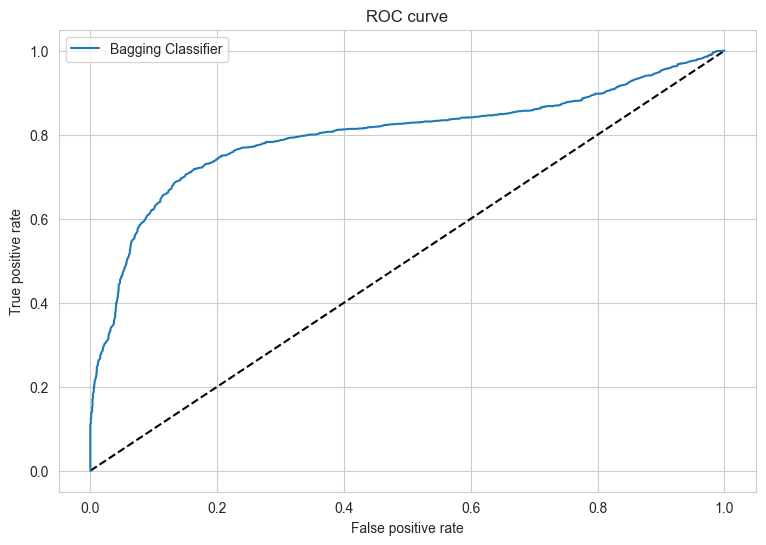

In [66]:
from sklearn import metrics
# The random forest model by itself
y_pred_rf = fit.predict_proba(X)[:, 1]
y_pred = fit.predict(X)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y, y_pred_rf)
print(metrics.classification_report(y, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (9,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'Bagging Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Random Forest를 사용하면 어떨까?

In [67]:
n_estimator = 1000
rf = RandomForestClassifier(n_estimators = n_estimator, criterion = 'entropy', random_state = 42,
                            class_weight = 'balanced_subsample', ccp_alpha = 0.001)
fit = rf.fit(X_train, y_train)

              precision    recall  f1-score   support

    no trade       0.76      0.95      0.85      1478
       trade       0.95      0.78      0.86      1994

    accuracy                           0.85      3472
   macro avg       0.86      0.86      0.85      3472
weighted avg       0.87      0.85      0.85      3472



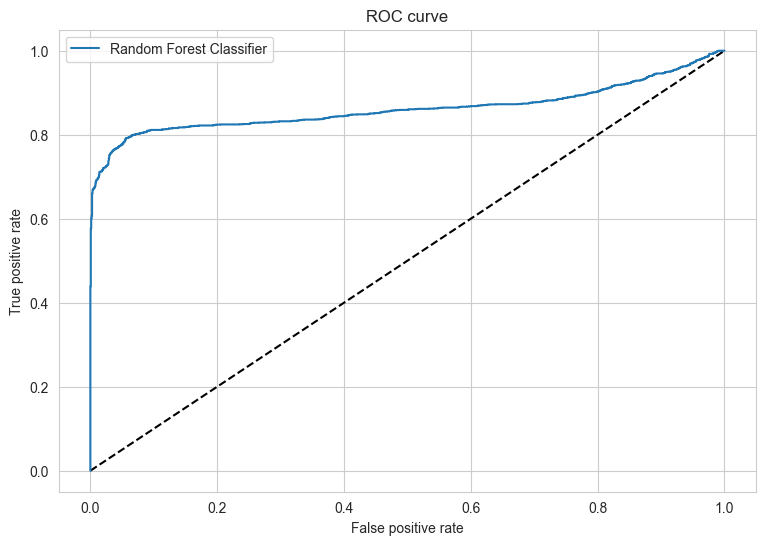

In [68]:
y_pred_rf = fit.predict_proba(X)[:, 1]
y_pred = fit.predict(X)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y, y_pred_rf)
print(metrics.classification_report(y, y_pred, target_names = ['no trade',' trade']))

plt.figure(figsize = (9,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()